<a href="https://colab.research.google.com/github/rrstats/doge/blob/main/DOGE_USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datascience import*
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import pandas as pd
import datetime as datetime

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [ ]:
doge = Table().read_table('DOGE-USD.csv')
doge

Date,Open,High,Low,Close,Adj Close,Volume
2021-04-27,0.271427,0.279629,0.264928,0.272188,0.272188,3590611310
2021-04-28,0.272273,0.344662,0.256231,0.323682,0.323682,14464343767
2021-04-29,0.323232,0.323881,0.296904,0.305169,0.305169,5027354503
2021-04-30,0.304702,0.339757,0.302981,0.337561,0.337561,5290390982
2021-05-01,0.337559,0.397135,0.32829,0.392987,0.392987,10123343703
2021-05-02,0.391087,0.400029,0.364874,0.376046,0.376046,8040406918
2021-05-03,0.373631,0.445567,0.373631,0.441707,0.441707,10526649978
2021-05-04,0.440274,0.605998,0.4008,0.541334,0.541334,38238126181
2021-05-05,0.537355,0.695262,0.523822,0.657633,0.657633,42525098292
2021-05-06,0.652842,0.663616,0.545102,0.580804,0.580804,18989900291


In [ ]:
weekdays = make_array('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')

In [ ]:
def day(date):
  dt = date
  year, month, day = (int(x) for x in dt.split('-'))
  weekday_name = datetime.date(year, month, day)
  return weekday_name.strftime('%A')
 

In [ ]:
doge = doge.with_columns('Day', doge.apply(day, 'Date'))
doge

Date,Open,High,Low,Close,Adj Close,Volume,Day
2021-04-27,0.271427,0.279629,0.264928,0.272188,0.272188,3590611310,Tuesday
2021-04-28,0.272273,0.344662,0.256231,0.323682,0.323682,14464343767,Wednesday
2021-04-29,0.323232,0.323881,0.296904,0.305169,0.305169,5027354503,Thursday
2021-04-30,0.304702,0.339757,0.302981,0.337561,0.337561,5290390982,Friday
2021-05-01,0.337559,0.397135,0.32829,0.392987,0.392987,10123343703,Saturday
2021-05-02,0.391087,0.400029,0.364874,0.376046,0.376046,8040406918,Sunday
2021-05-03,0.373631,0.445567,0.373631,0.441707,0.441707,10526649978,Monday
2021-05-04,0.440274,0.605998,0.4008,0.541334,0.541334,38238126181,Tuesday
2021-05-05,0.537355,0.695262,0.523822,0.657633,0.657633,42525098292,Wednesday
2021-05-06,0.652842,0.663616,0.545102,0.580804,0.580804,18989900291,Thursday


In [ ]:
vol = doge.select('Date', 'Volume', 'Day')
vol

Date,Volume,Day
2021-04-27,3590611310,Tuesday
2021-04-28,14464343767,Wednesday
2021-04-29,5027354503,Thursday
2021-04-30,5290390982,Friday
2021-05-01,10123343703,Saturday
2021-05-02,8040406918,Sunday
2021-05-03,10526649978,Monday
2021-05-04,38238126181,Tuesday
2021-05-05,42525098292,Wednesday
2021-05-06,18989900291,Thursday


In [ ]:
def weekday_total(tab1):
  tots=[]
  weekdays = make_array('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')

  for i in weekdays:
    volume = tab1.where('Day', are.containing(i)).column('Volume')
    #print(volume)
    tots.append(np.sum(volume))
  return tots


In [ ]:
weekday_total(vol)

[145385689898,
 138922718113,
 170053925149,
 186506744985,
 155756598156,
 150749821779,
 121591599455]

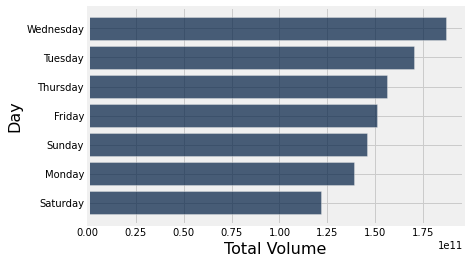

In [ ]:
vol_tab = Table().with_columns('Day', weekdays,
                               'Total Volume', weekday_total(vol))
vol_tab.sort('Total Volume', descending=True).barh('Day')

In [ ]:
def weekday_median_volume(tab1):
  medians=[]
  for i in weekdays:
    volume = tab1.where('Day', are.containing(i)).column('Volume')
    #print(volume)
    medians.append(np.median(volume))
  return medians


In [ ]:
weekday_median_volume(vol)

[1260336793.0,
 1681399646.0,
 1766963639.0,
 1543405154.0,
 1629111897.5,
 1561453016.0,
 1181198332.0]

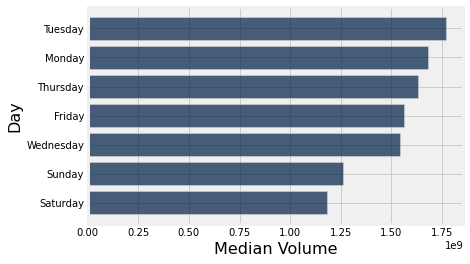

In [ ]:
vol_tab = vol_tab.with_columns('Median Volume', weekday_median_volume(vol))
vol_tab.select('Median Volume', 'Day').sort('Median Volume', descending=True).barh('Day')

In [ ]:
def weekday_mean_volume(tab1):
  means=[]
  for i in weekdays:
    volume = tab1.where('Day', are.containing(i)).column('Volume')
    #print(volume)
    means.append(np.mean(volume))
  return means


In [ ]:
weekday_mean_volume(vol)

[2795878651.8846154,
 2671590732.9423075,
 3208564625.4528303,
 3518995188.3962264,
 2995319195.3076925,
 2899035034.2115383,
 2338299989.519231]

In [ ]:
vol_table = Table().with_columns('Day', weekdays,
                                 'Total Volume', weekday_total(vol),
                                 'Mean Volume', weekday_mean_volume(vol),
                                 'Median Volume', weekday_median_volume(vol))
vol_table

Day,Total Volume,Mean Volume,Median Volume
Sunday,145385689898,2.79588e+09,1.26034e+09
Monday,138922718113,2.67159e+09,1.6814e+09
Tuesday,170053925149,3.20856e+09,1.76696e+09
Wednesday,186506744985,3.519e+09,1.54341e+09
Thursday,155756598156,2.99532e+09,1.62911e+09
Friday,150749821779,2.89904e+09,1.56145e+09
Saturday,121591599455,2.3383e+09,1.1812e+09


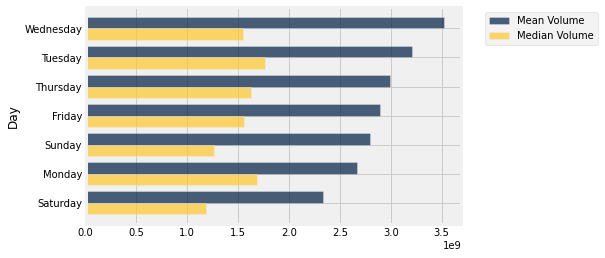

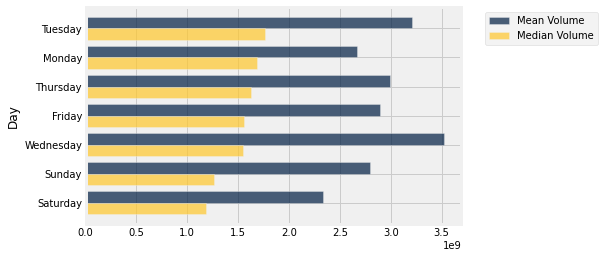

In [ ]:
vol_table.drop('Total Volume').sort('Mean Volume', descending=True).barh('Day'),
vol_table.drop('Total Volume').sort('Median Volume', descending=True).barh('Day')

## END OF VOLUME ANALYSIS

## PRICE ANALYSIS: ONE DAY AT A TIME


In [ ]:
#Prices only for Monday & Tuesday
prices = doge.select('Open', 'High', 'Close', 'Day', 'Date')
p_mon_tue = prices.where('Day', are.not_containing('Wedn')).where(
    'Day', are.not_containing('Thur')).where(
        'Day', are.not_containing('Fri')).where(
            'Day', are.not_containing('Sat')).where(
                'Day', are.not_containing('Sund'))
p_mon_tue

Open,High,Close,Day,Date
0.271427,0.279629,0.272188,Tuesday,2021-04-27
0.373631,0.445567,0.441707,Monday,2021-05-03
0.440274,0.605998,0.541334,Tuesday,2021-05-04
0.569687,0.569687,0.449964,Monday,2021-05-10
0.450488,0.546651,0.495231,Tuesday,2021-05-11
0.513413,0.515221,0.487892,Monday,2021-05-17
0.486954,0.515599,0.476115,Tuesday,2021-05-18
0.306715,0.371485,0.366162,Monday,2021-05-24
0.366041,0.38001,0.346302,Tuesday,2021-05-25
0.301949,0.329163,0.32581,Monday,2021-05-31


In [ ]:
p_mon = p_mon_tue.where('Day', are.containing('Mon'))
p_mon


Open,High,Close,Day,Date
0.373631,0.445567,0.441707,Monday,2021-05-03
0.569687,0.569687,0.449964,Monday,2021-05-10
0.513413,0.515221,0.487892,Monday,2021-05-17
0.306715,0.371485,0.366162,Monday,2021-05-24
0.301949,0.329163,0.32581,Monday,2021-05-31
0.371566,0.379678,0.33105,Monday,2021-06-07
0.323903,0.336927,0.332085,Monday,2021-06-14
0.28066,0.280889,0.178691,Monday,2021-06-21
0.264918,0.266982,0.256857,Monday,2021-06-28
0.246419,0.246419,0.231614,Monday,2021-07-05


In [ ]:
def week_line(tab2):
  weekdays = make_array('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')

  for i in weekdays:
    wk = tab2.where('Day', are.containing(i))
    wk.plot('Date', 'Open')

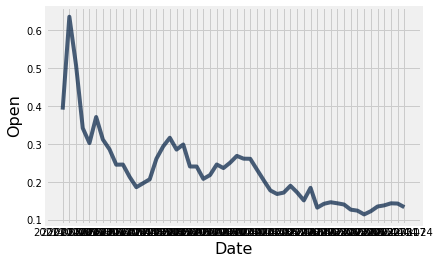

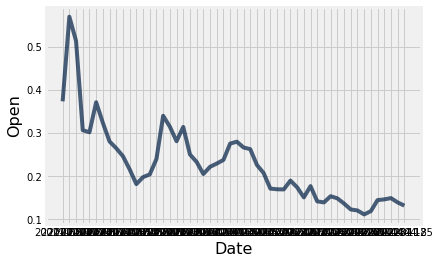

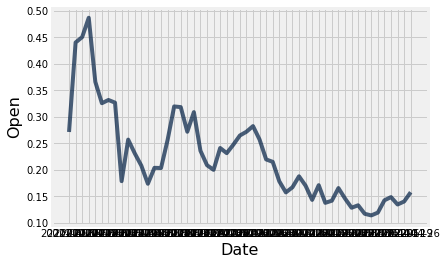

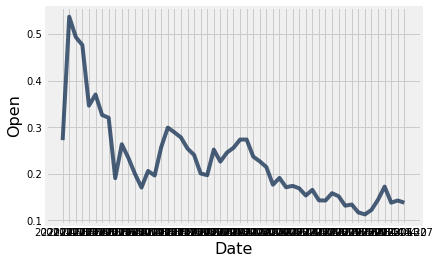

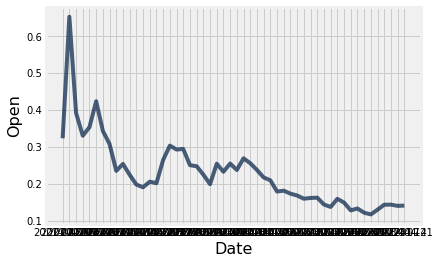

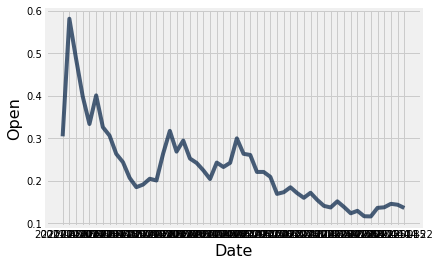

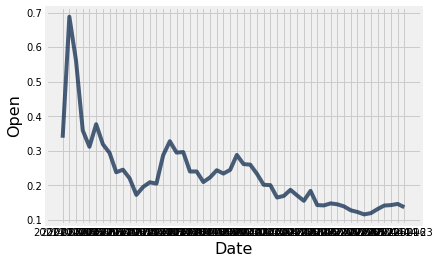

In [ ]:
week_line(prices)